<a href="https://colab.research.google.com/github/KhaiHoanNinh/bt_AI/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
11501568/11490434 [==============================]

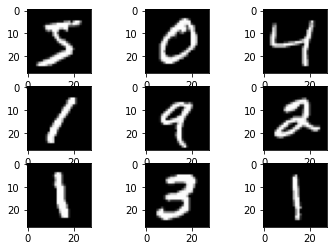

Epoch 1/100
235/235 [==============================] - 7s 7ms/step - loss: 0.3012 - accuracy: 0.9055 - val_loss: 0.1375 - val_accuracy: 0.9542
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1136 - accuracy: 0.9651 - val_loss: 0.1555 - val_accuracy: 0.9503
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0786 - accuracy: 0.9755 - val_loss: 0.0911 - val_accuracy: 0.9699
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0598 - accuracy: 0.9810 - val_loss: 0.0787 - val_accuracy: 0.9759
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0473 - accuracy: 0.9845 - val_loss: 0.0752 - val_accuracy: 0.9786
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0387 - accuracy: 0.9878 - val_loss: 0.0724 - val_accuracy: 0.9799
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0324 - accuracy: 0.9891 - val_loss: 0.0813 - val_accuracy: 0.9784

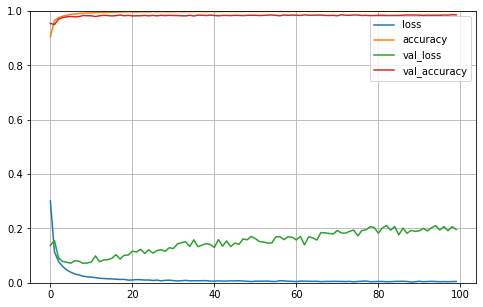

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


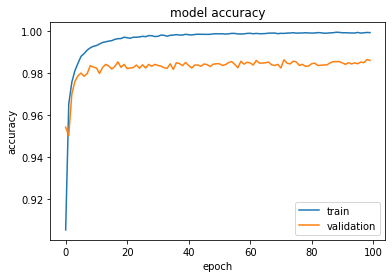

Sai so kiem tra la: 0.1964043378829956
Do chinh xac kiem tra 98.58999848365784


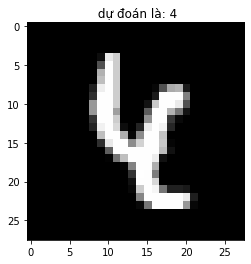

In [ ]:
#MNIST
from keras.datasets import mnist
import numpy as np
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import pandas as pd


model = Sequential()                                           
model.add(Dense(512,  activation='relu', input_shape=(784,)))   
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))                                                            
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))                                          
model.summary()


(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_pre = x_test
y_ktr = y_test
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255
y_train = np_utils.to_categorical(y_train, 10)          
y_test = np_utils.to_categorical(y_test, 10) 


model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics='accuracy')                          
history = model.fit(x_train, y_train, batch_size=256, epochs=100, verbose = 1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
y_pred = model.predict(x_test)
y_pred

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upperleft')
plt.show()


#Hàm fit ():
Label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
test =160

plt.title(" dự đoán là: " + Label[np.argmax(model.predict(x_pre[test].reshape(-1,784)))])

y_ktr[test]
plt.imshow(x_pre[test], cmap=plt.get_cmap('gray'))
# do chinh xac
k = model.evaluate(x_test, y_test , verbose=0)
print('Sai so kiem tra la:',k[0])
print('Do chinh xac kiem tra', k[1]*100)